## Análise das Resenhas de Apps de Bancos

### Parte I - Compreensão dos Dados

### 1. Importação das bibliotecas necessárias

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### 2. Importação dos dados

São dois conjuntos de dados, a primeira planilha é o conjunto de dados para treinamento do modelo de Machine Learning e a segunda é conjunto de dados para avaliação do modelo. 

Como a intenção aqui é conhecer os dados, será feita importação e a análise somente do conjunto de dados de treinamento

In [2]:
# importação da primeira planilha - para treinamento
resenhas_df = pd.read_excel('../data/Satisfação com App.xlsx')
resenhas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8702 entries, 0 to 8701
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Instituição               8702 non-null   object        
 1   Comentario                8698 non-null   object        
 2   Data                      8702 non-null   datetime64[ns]
 3   Classificação             8702 non-null   int64         
 4   Elogio quanto ao app      8702 non-null   object        
 5   Reclamação quanto ao app  8702 non-null   object        
 6   Elogio a Instituição      8702 non-null   object        
 7   Reclamação a Instituição  8702 non-null   object        
 8   Não Classificável         8702 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 612.0+ KB


In [3]:
# identificar valores nulos
resenhas_df.isna().sum()

Instituição                 0
Comentario                  4
Data                        0
Classificação               0
Elogio quanto ao app        0
Reclamação quanto ao app    0
Elogio a Instituição        0
Reclamação a Instituição    0
Não Classificável           0
dtype: int64

In [4]:
# excluir os registros com valores missing
resenhas_df.dropna(inplace=True)

In [5]:
# A criação de variáveis é uma etapa de feature engineering. Como a variável aqui será utilizada
# para criação de outro dataset, optou-se por já disponibilizá-la.
resenhas_df['qtde_caracteres']  = resenhas_df['Comentario'].str.len().fillna(1).astype(int)
resenhas_df['qtde_palavras']  = resenhas_df['Comentario'].fillna(' ').str.split().str.len()
resenhas_df['qtde_palavras']  = resenhas_df['qtde_palavras'].fillna(0).astype(int)

In [6]:
# alterar as variáveis relativas aos sentimentos atribuídos às resenhas dos usuários em maiúsculas
ls_cols_sentimentos = [col for col in resenhas_df.columns if 'Elogio' in col or 'Reclamação' in col or 'Classificável' in col]
resenhas_df[ls_cols_sentimentos] = resenhas_df[ls_cols_sentimentos].apply(lambda x: x.str.upper())

# unificar a ausência do til
for var in ls_cols_sentimentos:
    resenhas_df[var]        = resenhas_df[var].map({'NÃO': 'NAO', 'SIM': 'SIM'})

In [7]:
# criar um conjunto de dados para cada instituição
resenha_Bradesco = resenhas_df[resenhas_df.Instituição == 'Banco Bradesco'].drop('Instituição', axis = 1)
resenha_Itau     = resenhas_df[resenhas_df.Instituição == 'Banco Itau'].drop('Instituição', axis = 1)
resenha_B_Brasil = resenhas_df[resenhas_df.Instituição == 'Banco do Brasil'].drop('Instituição', axis = 1)
resenha_Caixa    = resenhas_df[resenhas_df.Instituição == 'Caixa Econômica Federal'].drop('Instituição', axis = 1)
resenha_Nubank   = resenhas_df[resenhas_df.Instituição == 'Nubank'].drop('Instituição', axis = 1)

In [8]:
# amostra dos dados
resenhas_df.head()

,Instituição,Comentario,Data,Classificação,Elogio quanto ao app,Reclamação quanto ao app,Elogio a Instituição,Reclamação a Instituição,Não Classificável,qtde_caracteres,qtde_palavras
0,Banco do Brasil,Muito bom ajuda muito,2019-07-21,5,SIM,NAO,NAO,NAO,NAO,21,4
1,Banco do Brasil,excelente,2019-07-21,5,SIM,NAO,NAO,NAO,NAO,9,1
2,Banco do Brasil,Bom,2019-07-21,5,SIM,NAO,NAO,NAO,NAO,3,1
3,Banco do Brasil,aplicativo muito top,2019-07-21,5,SIM,NAO,NAO,NAO,NAO,20,3
4,Banco do Brasil,Fácil e prático,2019-07-21,5,SIM,NAO,NAO,NAO,NAO,15,3


### 3. Análise dos Dados

In [9]:
# definir padrão dos gráficos
sns.set_context('talk')

#### 3.1. Quantidade de registros por instituição

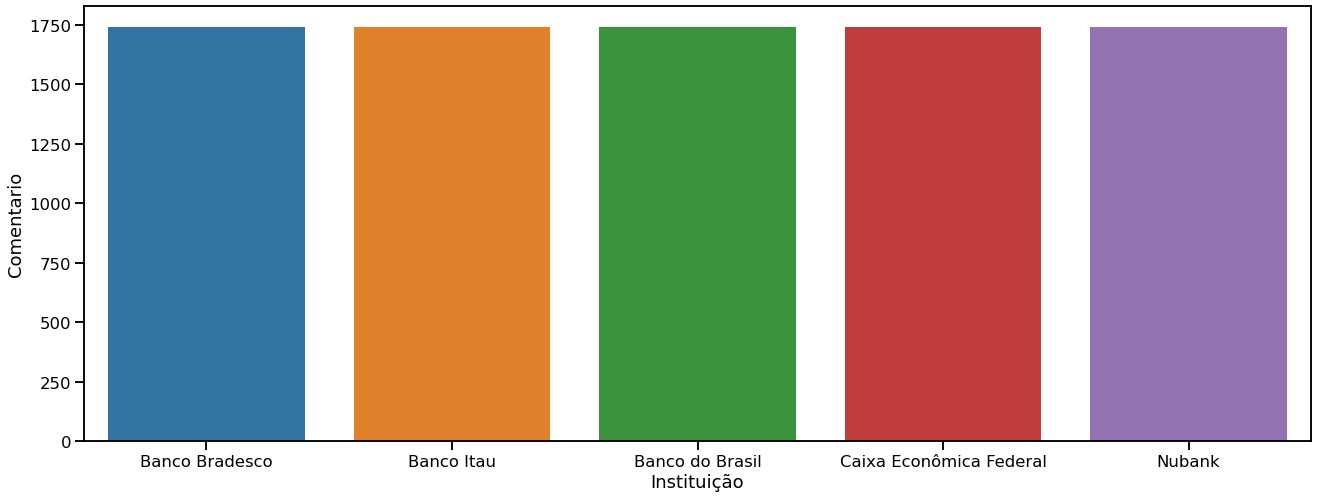

In [41]:
registros_por_instituicao = resenhas_df.groupby('Instituição').count()

plt.figure(figsize = (22, 8))
ax = sns.barplot(x = registros_por_instituicao.index,
                 y = 'Comentario',
                 data = registros_por_instituicao)

#### 3.2. Avaliação média por instituição

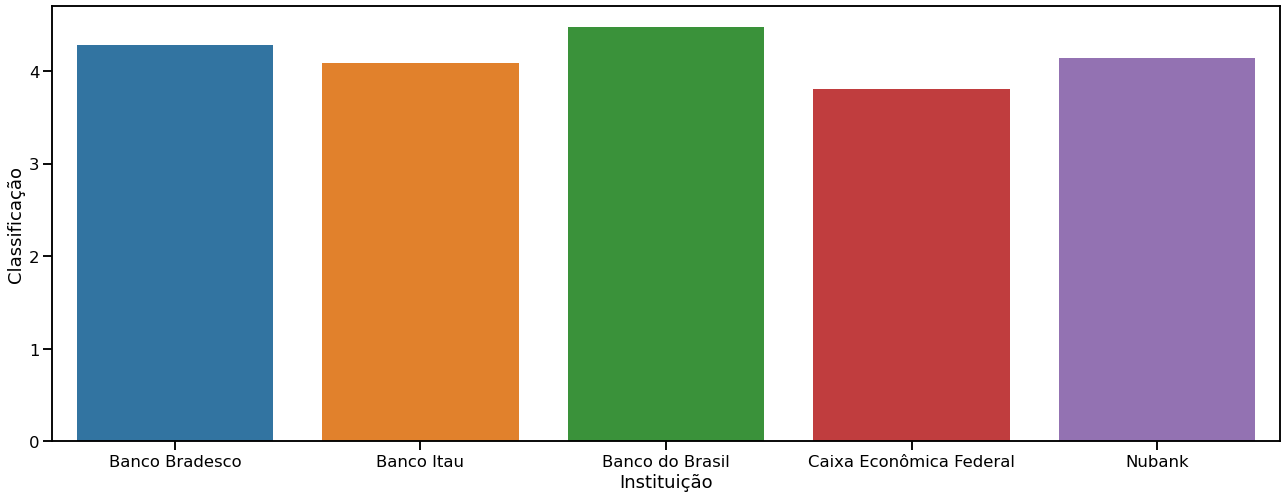

In [11]:
nota_media = resenhas_df.groupby('Instituição').mean()

plt.figure(figsize = (22, 8))
sns.barplot(x = registros_por_instituicao.index, y = 'Classificação', data = nota_media)
plt.show()

#### 3.2.1. Quantidade de cada avaliação em todo o conjunto de dados

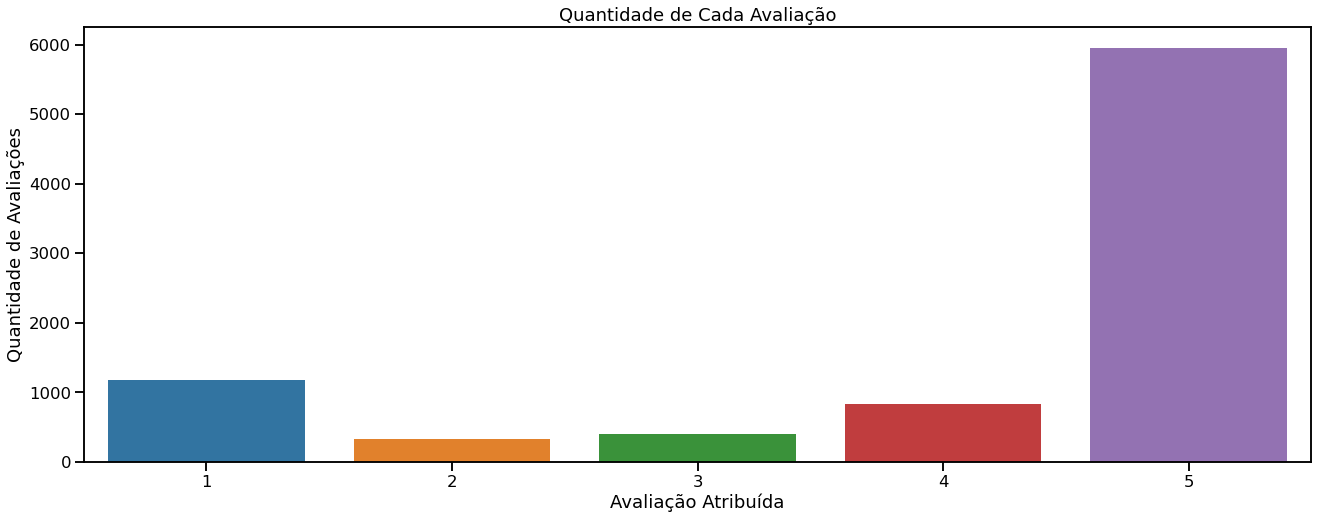

In [12]:
plt.figure(figsize = (22, 8))
ax = sns.countplot(x='Classificação', data=resenhas_df)
ax.set(title = 'Quantidade de Cada Avaliação', xlabel='Avaliação Atribuída', ylabel='Quantidade de Avaliações')
plt.show()

#### 3.2.2. Quantidade de cada avaliação de cada instituição

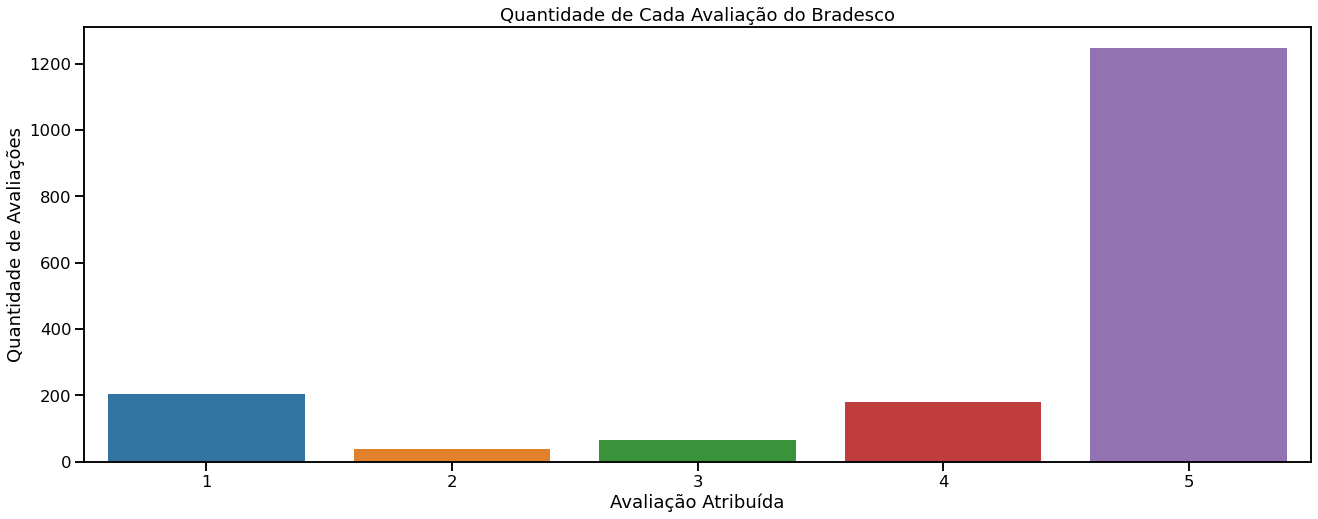

In [13]:
plt.figure(figsize = (22, 8))

ax = sns.countplot(x='Classificação', data=resenha_Bradesco)
ax.set(title = 'Quantidade de Cada Avaliação do Bradesco', xlabel='Avaliação Atribuída', ylabel='Quantidade de Avaliações')
plt.show()

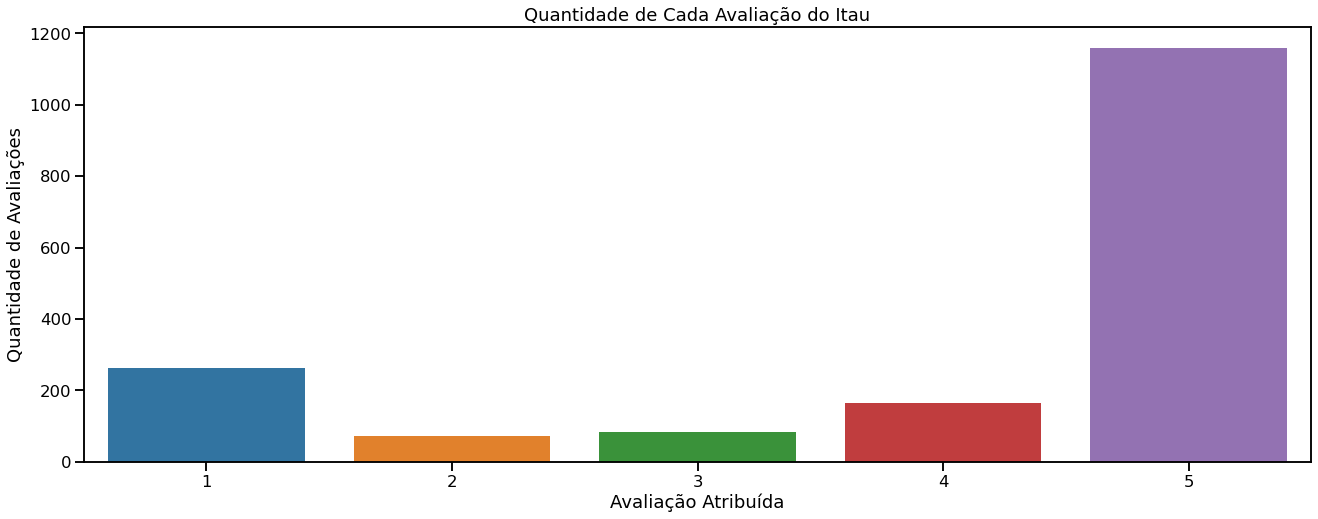

In [14]:
plt.figure(figsize = (22, 8))

ax = sns.countplot(x='Classificação', data=resenha_Itau)
ax.set(title = 'Quantidade de Cada Avaliação do Itau', xlabel='Avaliação Atribuída', ylabel='Quantidade de Avaliações')
plt.show()

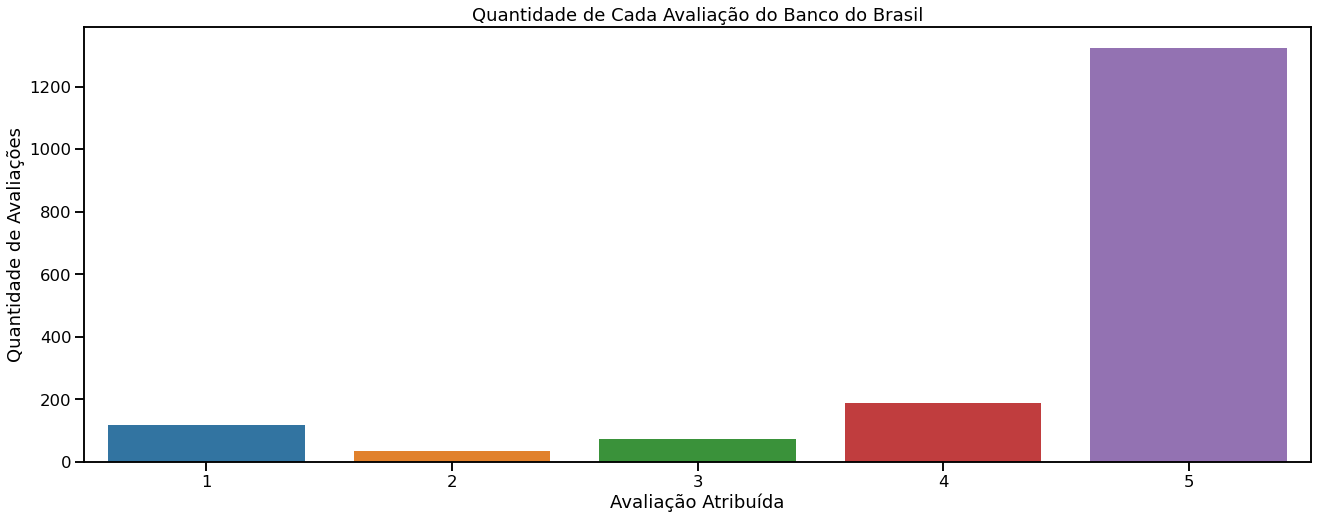

In [15]:
plt.figure(figsize = (22, 8))

ax = sns.countplot(x='Classificação', data=resenha_B_Brasil)
ax.set(title = 'Quantidade de Cada Avaliação do Banco do Brasil', xlabel='Avaliação Atribuída', ylabel='Quantidade de Avaliações')
plt.show()

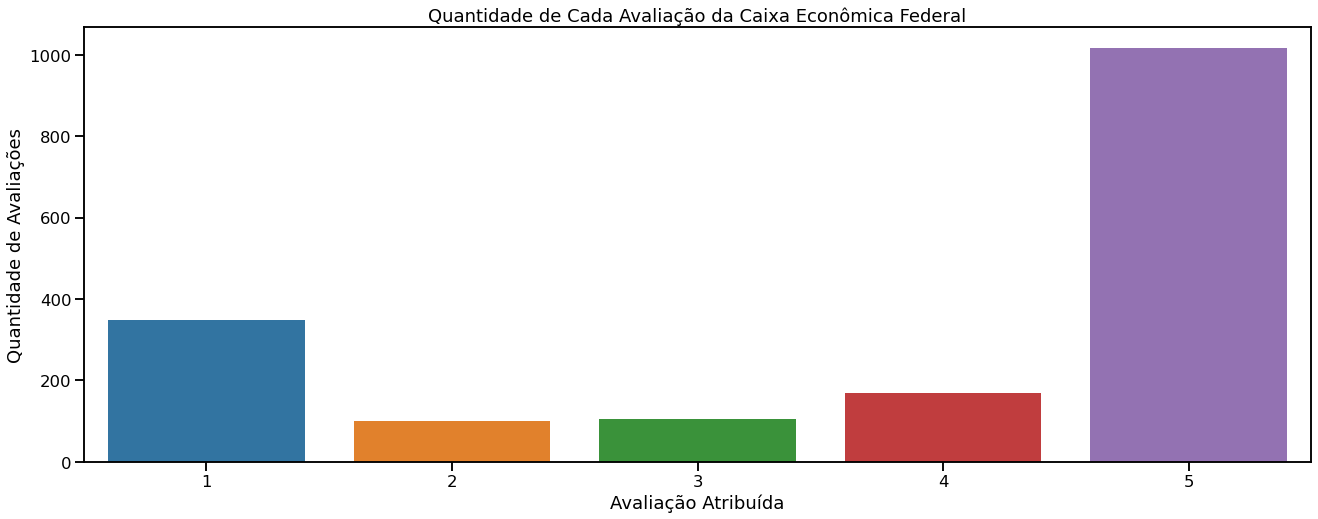

In [16]:
plt.figure(figsize = (22, 8))

ax = sns.countplot(x='Classificação', data=resenha_Caixa)
ax.set(title = 'Quantidade de Cada Avaliação da Caixa Econômica Federal', xlabel='Avaliação Atribuída', ylabel='Quantidade de Avaliações')
plt.show()

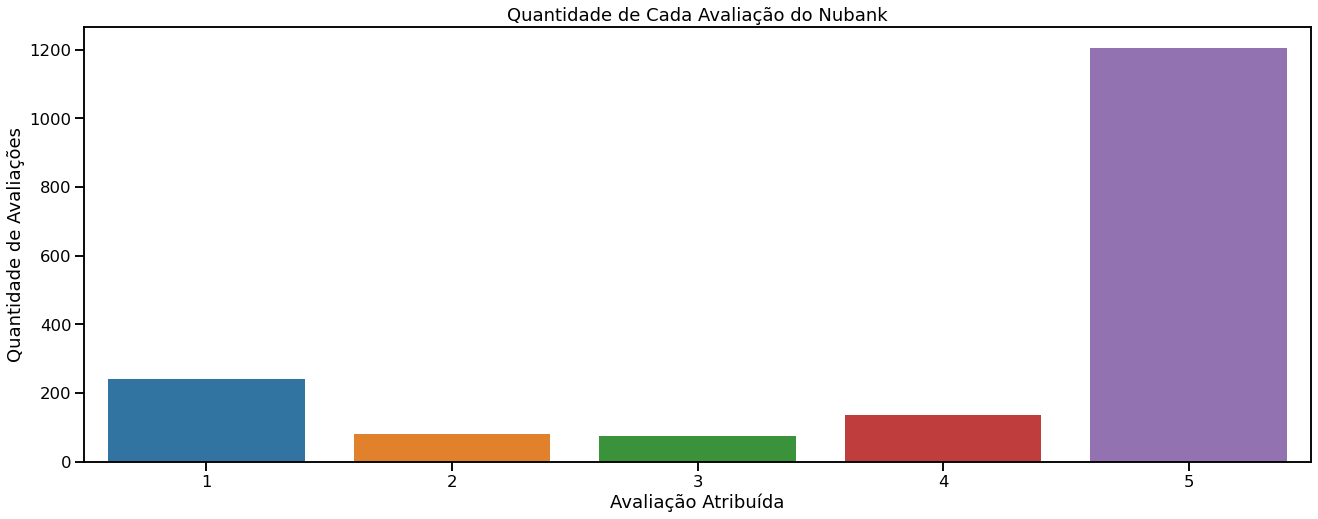

In [17]:
plt.figure(figsize = (22, 8))

ax = sns.countplot(x='Classificação', data=resenha_Nubank)
ax.set(title = 'Quantidade de Cada Avaliação do Nubank', xlabel='Avaliação Atribuída', ylabel='Quantidade de Avaliações')
plt.show()

#### 3.3. Evolução da nota de avaliação ao longo do período

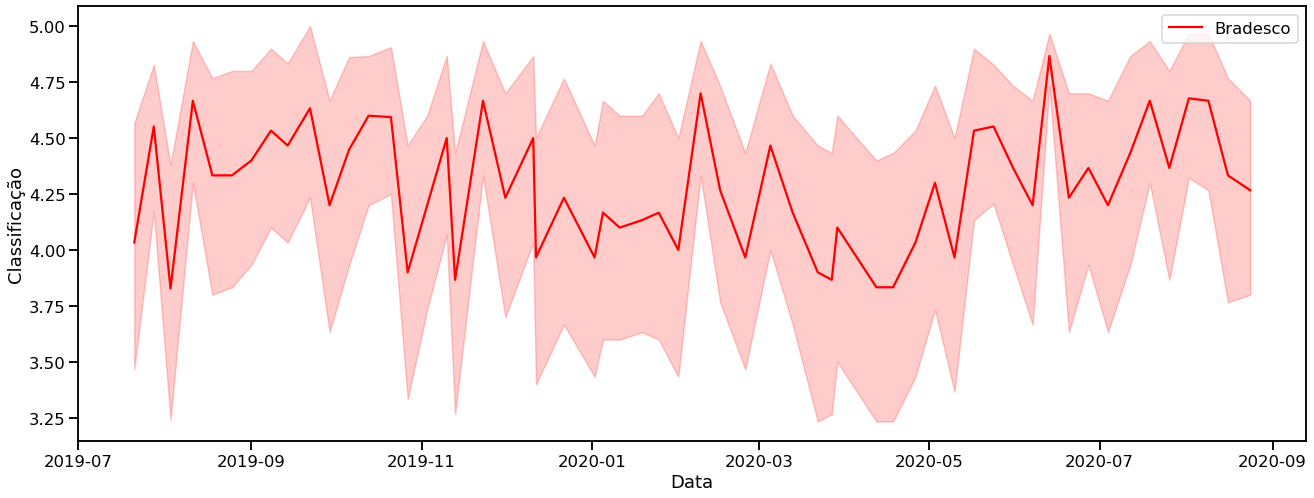

In [18]:
plt.figure(figsize = (22, 8))

sns.lineplot(x='Data', y='Classificação', data=resenha_Bradesco, estimator = 'mean', markers=True, color='red', label="Bradesco")
plt.show()

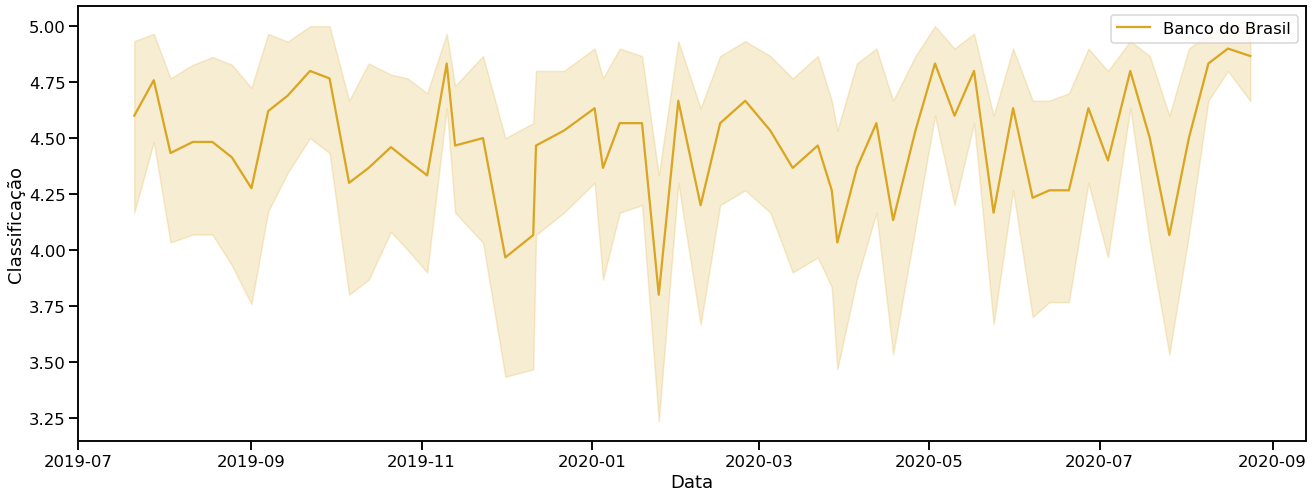

In [19]:
plt.figure(figsize = (22, 8))

sns.lineplot(x='Data', y='Classificação', data=resenha_B_Brasil, estimator = 'mean', markers=True, color='goldenrod', label="Banco do Brasil")
plt.show()

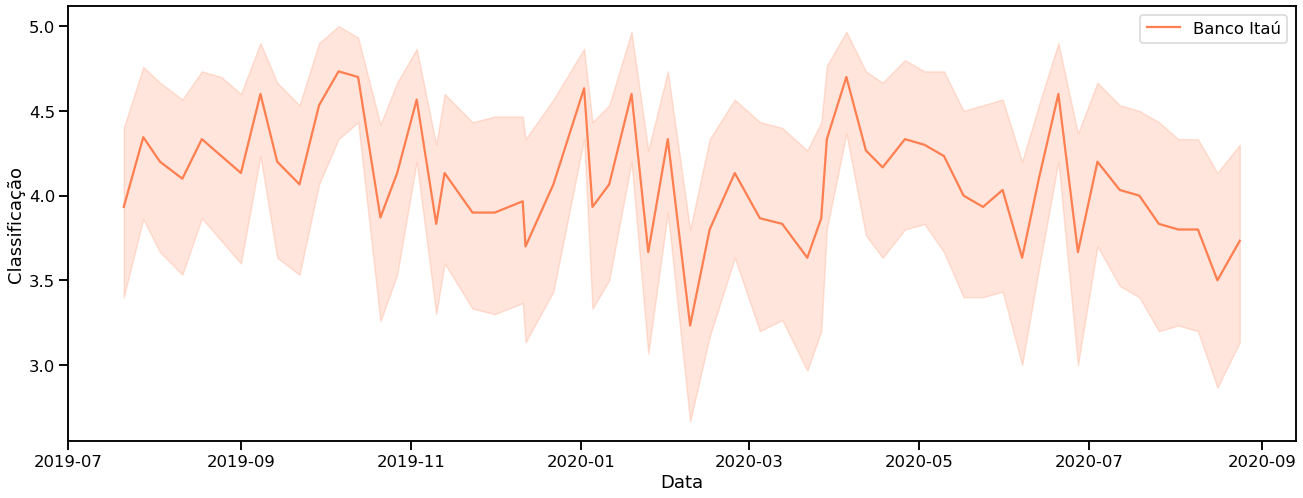

In [20]:
plt.figure(figsize = (22, 8))

sns.lineplot(x='Data', y='Classificação', data=resenha_Itau, estimator = 'mean', markers=True, color='coral', label='Banco Itaú')
plt.show()

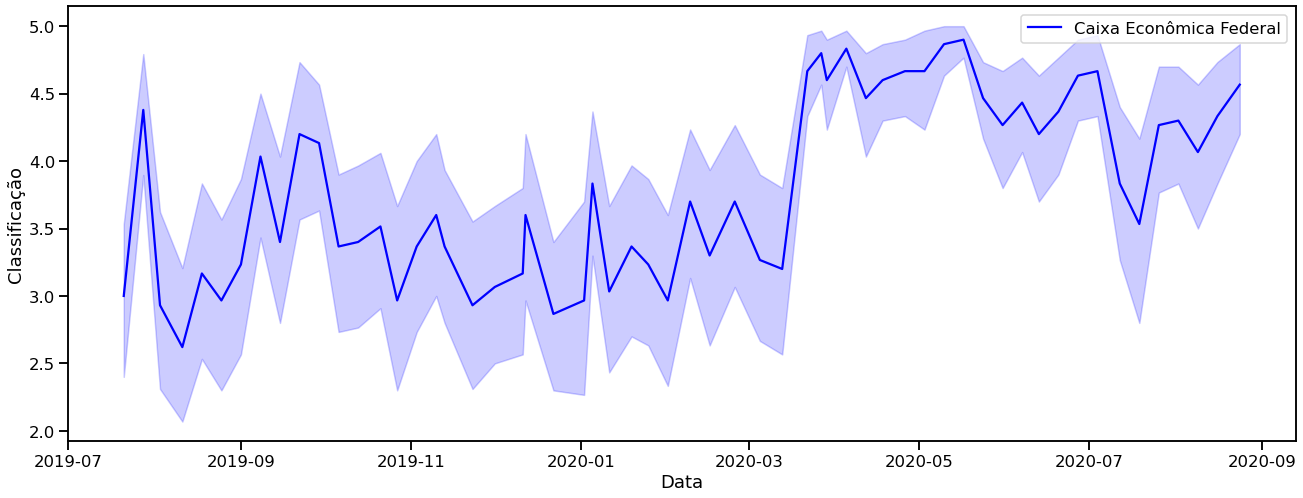

In [21]:
plt.figure(figsize = (22, 8))

sns.lineplot(x='Data', y='Classificação', data=resenha_Caixa, estimator = 'mean', markers=True, color='blue', label='Caixa Econômica Federal')
plt.show()

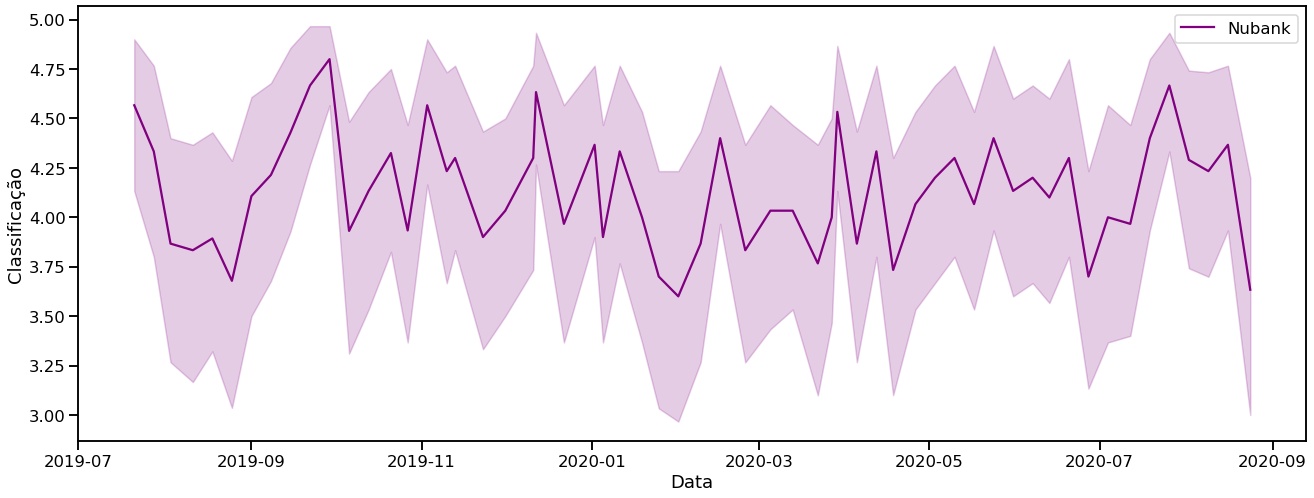

In [22]:
plt.figure(figsize = (22, 8))

sns.lineplot(x='Data', y='Classificação', data=resenha_Nubank, estimator = 'mean', markers=True, color='purple', label='Nubank')
plt.show()

#### 3.4. Quantidade média de caracteres ao longo do período

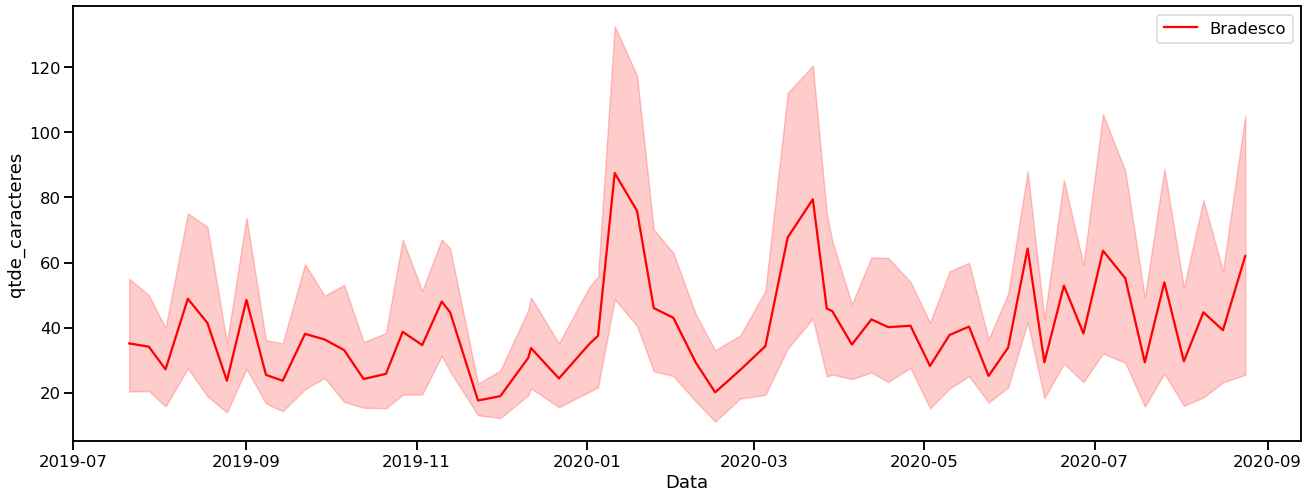

In [23]:
plt.figure(figsize = (22, 8))

sns.lineplot(x='Data', y='qtde_caracteres', data=resenha_Bradesco, estimator = 'mean', markers=True, color='red', label="Bradesco")
plt.show()

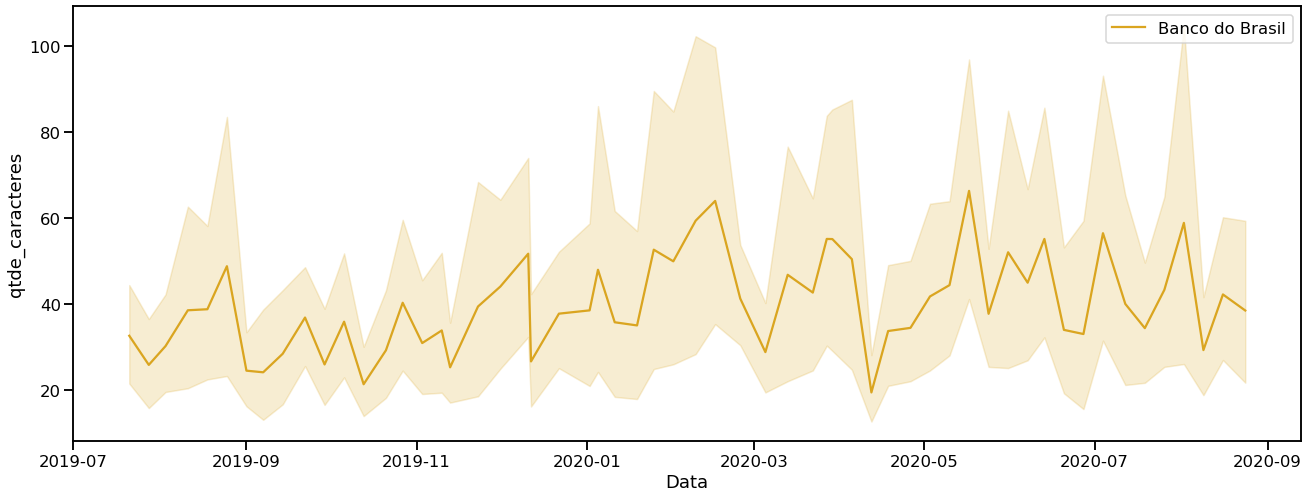

In [24]:
plt.figure(figsize = (22, 8))

sns.lineplot(x='Data', y='qtde_caracteres', data=resenha_B_Brasil, estimator = 'mean', markers=True, color='goldenrod', label="Banco do Brasil")
plt.show()

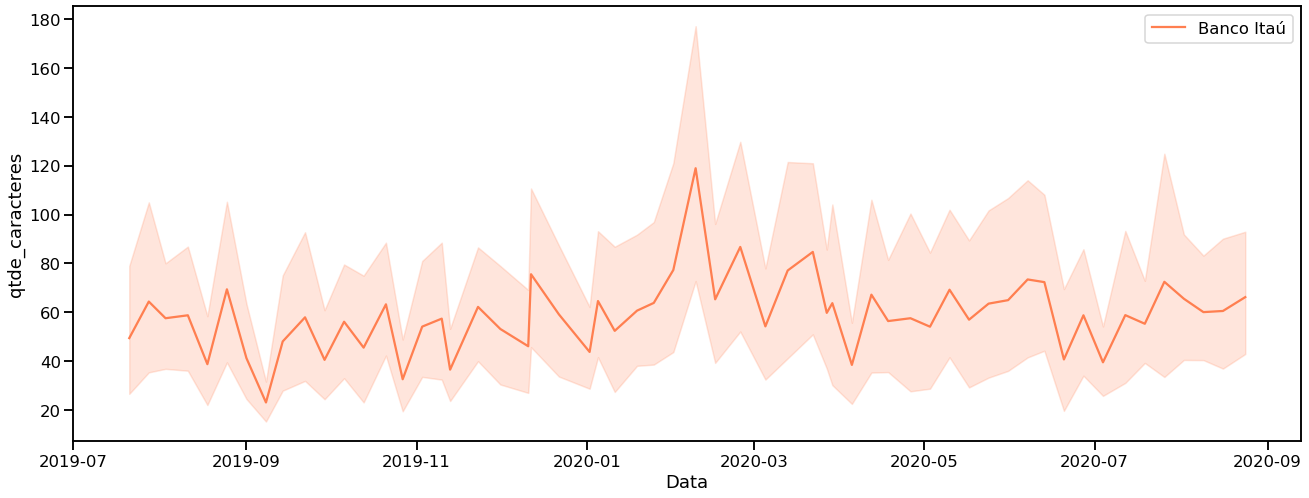

In [25]:
plt.figure(figsize = (22, 8))

sns.lineplot(x='Data', y='qtde_caracteres', data=resenha_Itau, estimator = 'mean', markers=True, color='coral', label='Banco Itaú')
plt.show()

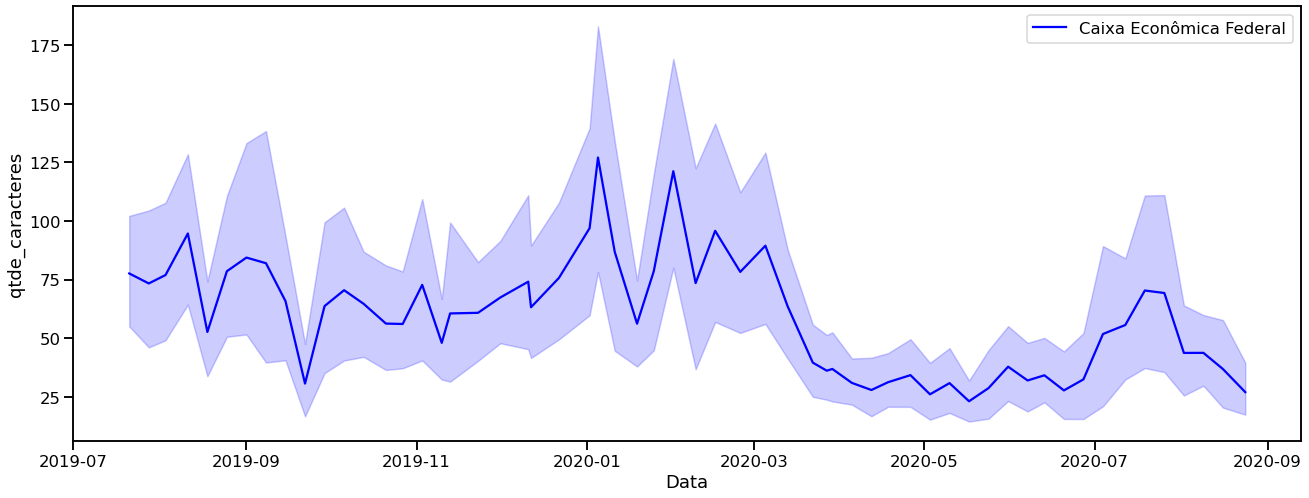

In [26]:
plt.figure(figsize = (22, 8))

sns.lineplot(x='Data', y='qtde_caracteres', data=resenha_Caixa, estimator = 'mean', markers=True, color='blue', label='Caixa Econômica Federal')
plt.show()

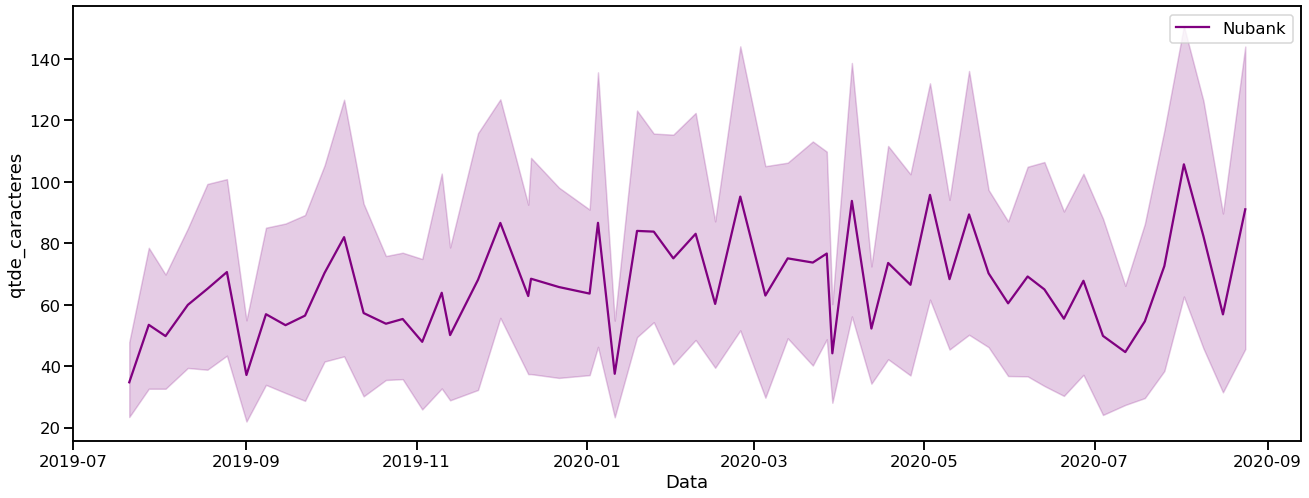

In [27]:
plt.figure(figsize = (22, 8))

sns.lineplot(x='Data', y='qtde_caracteres', data=resenha_Nubank, estimator = 'mean', markers=True, color='purple', label='Nubank')
plt.show()

### 3.6. Distribuição da quantidade de caracteres

#### 3.6.1. Distribuição de caracteres e palavras de todo o conjunto de dados

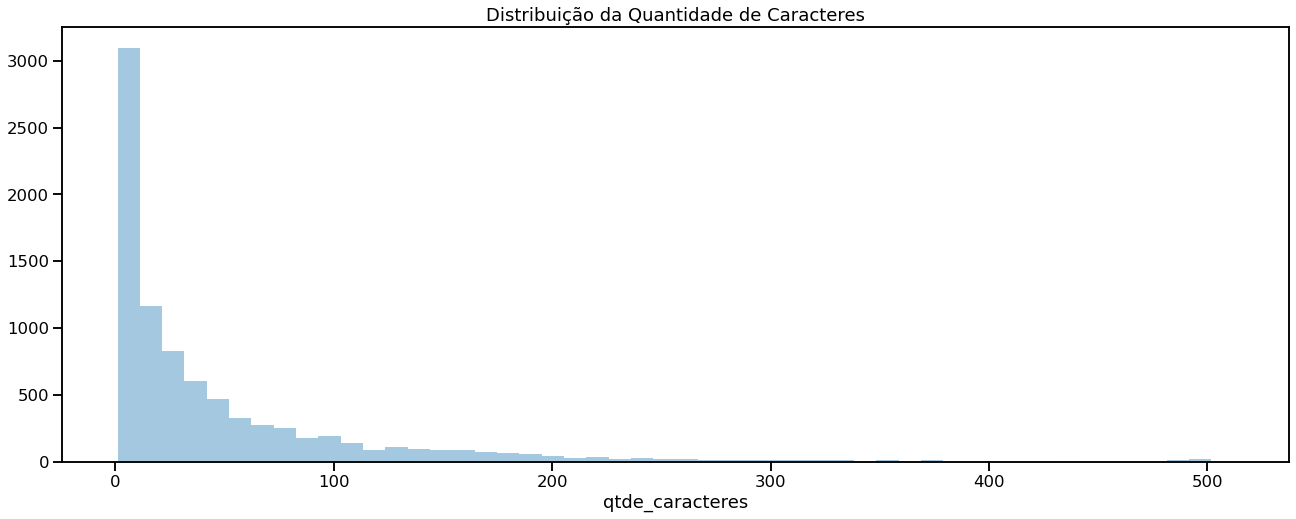

In [28]:
plt.figure(figsize = (22, 8))

sns.distplot(resenhas_df.qtde_caracteres.dropna(), kde=False).set_title('Distribuição da Quantidade de Caracteres')
plt.show()

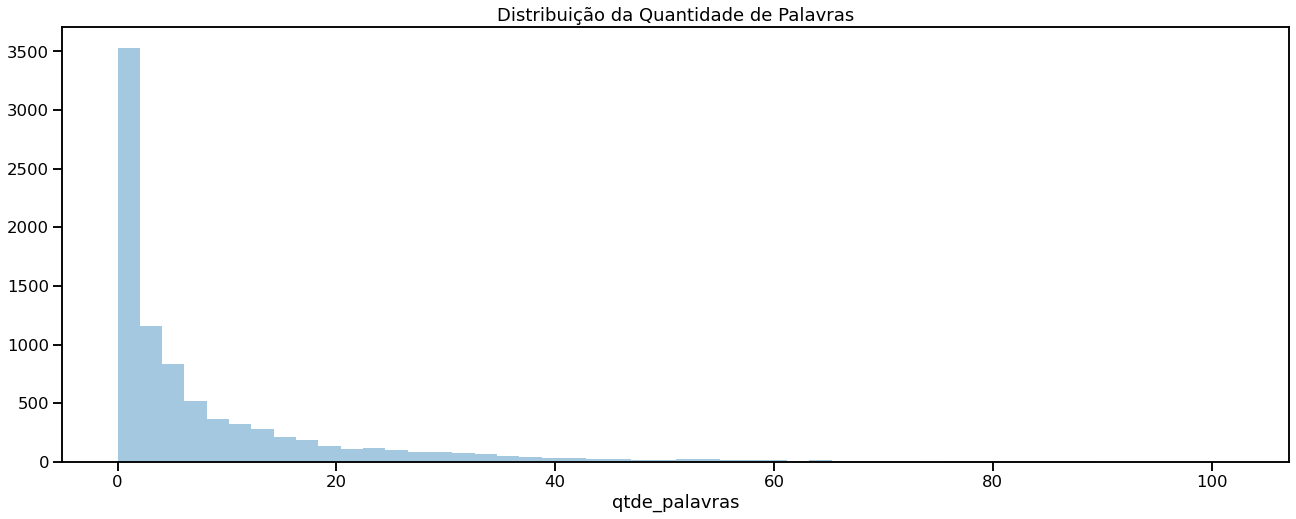

In [29]:
plt.figure(figsize = (22, 8))

sns.distplot(resenhas_df.qtde_palavras.dropna(), kde=False).set_title('Distribuição da Quantidade de Palavras')
plt.show()

### 3.6.2. Distribuição de caracteres de cada instituição

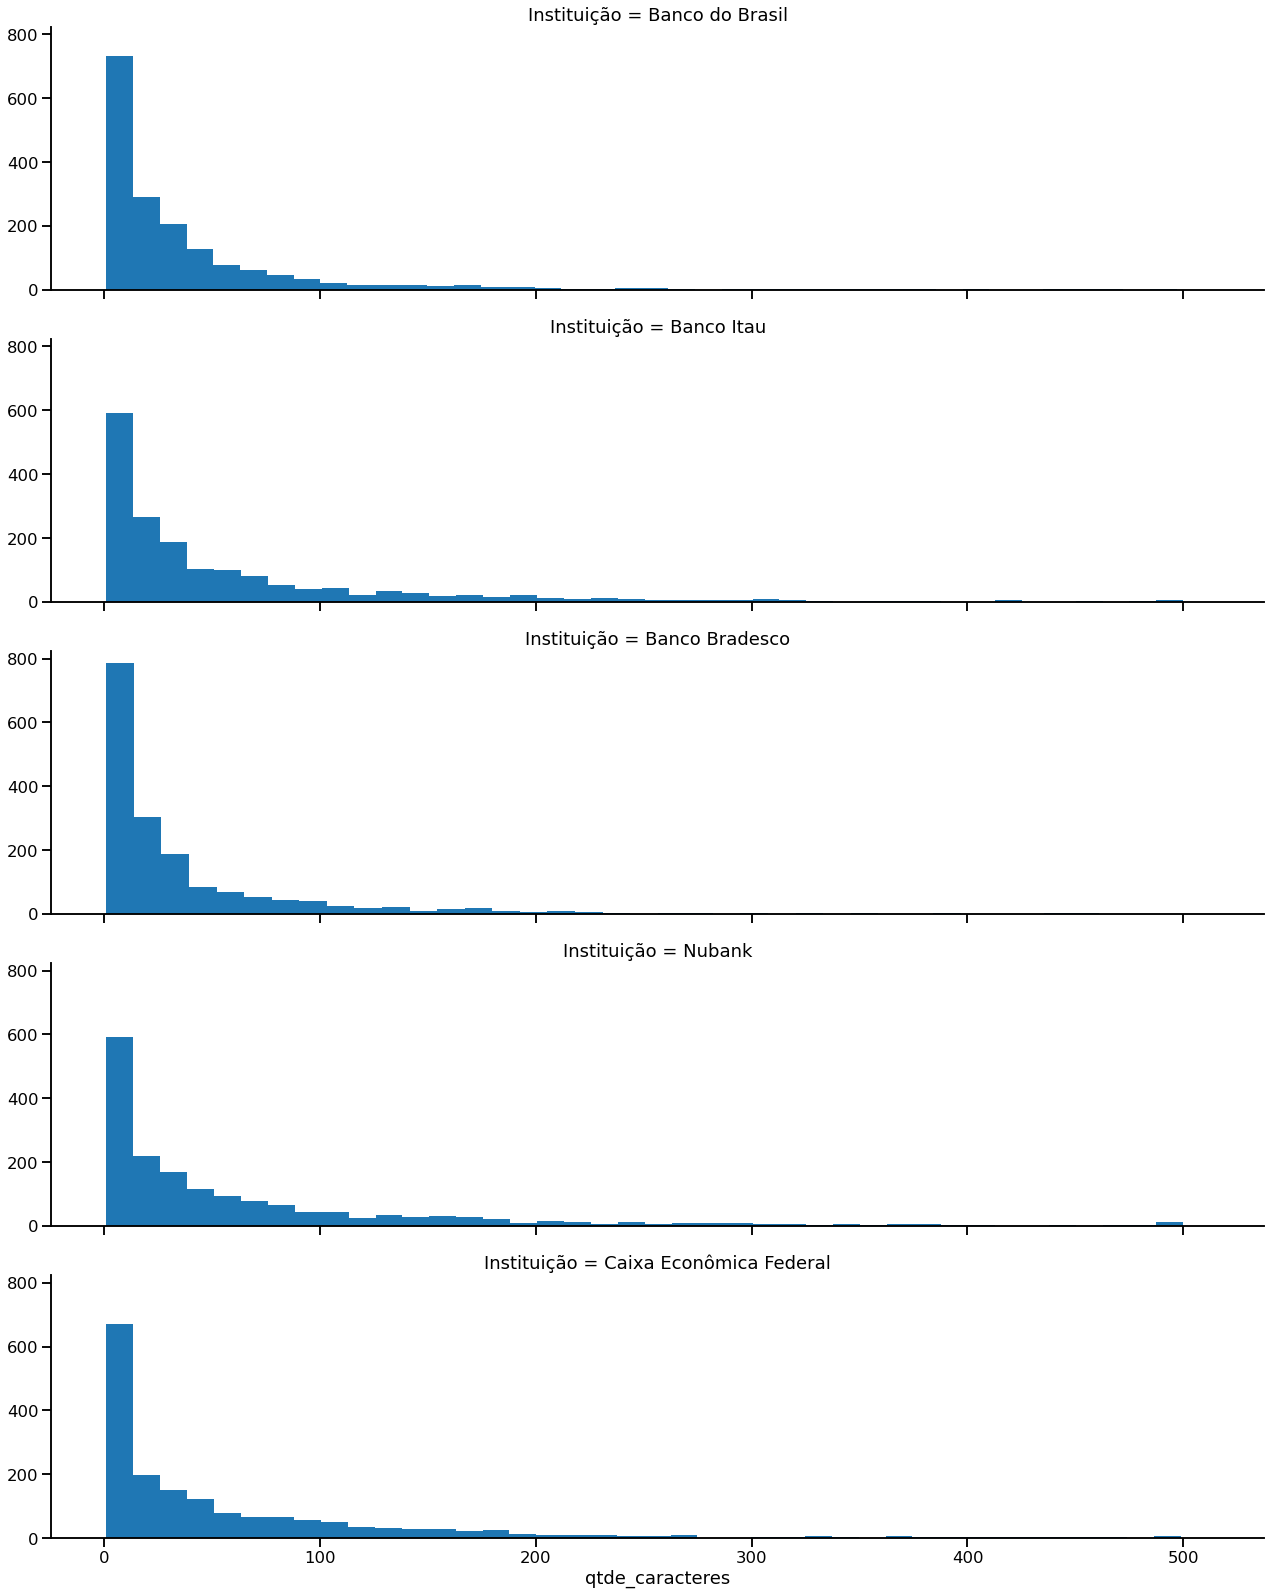

In [30]:
g = sns.FacetGrid(resenhas_df.dropna(), row='Instituição', height=4.5, aspect=4)
g = g.map(plt.hist, 'qtde_caracteres', bins=40)

### 3.6.3. Distribuição de palavras de cada instituição

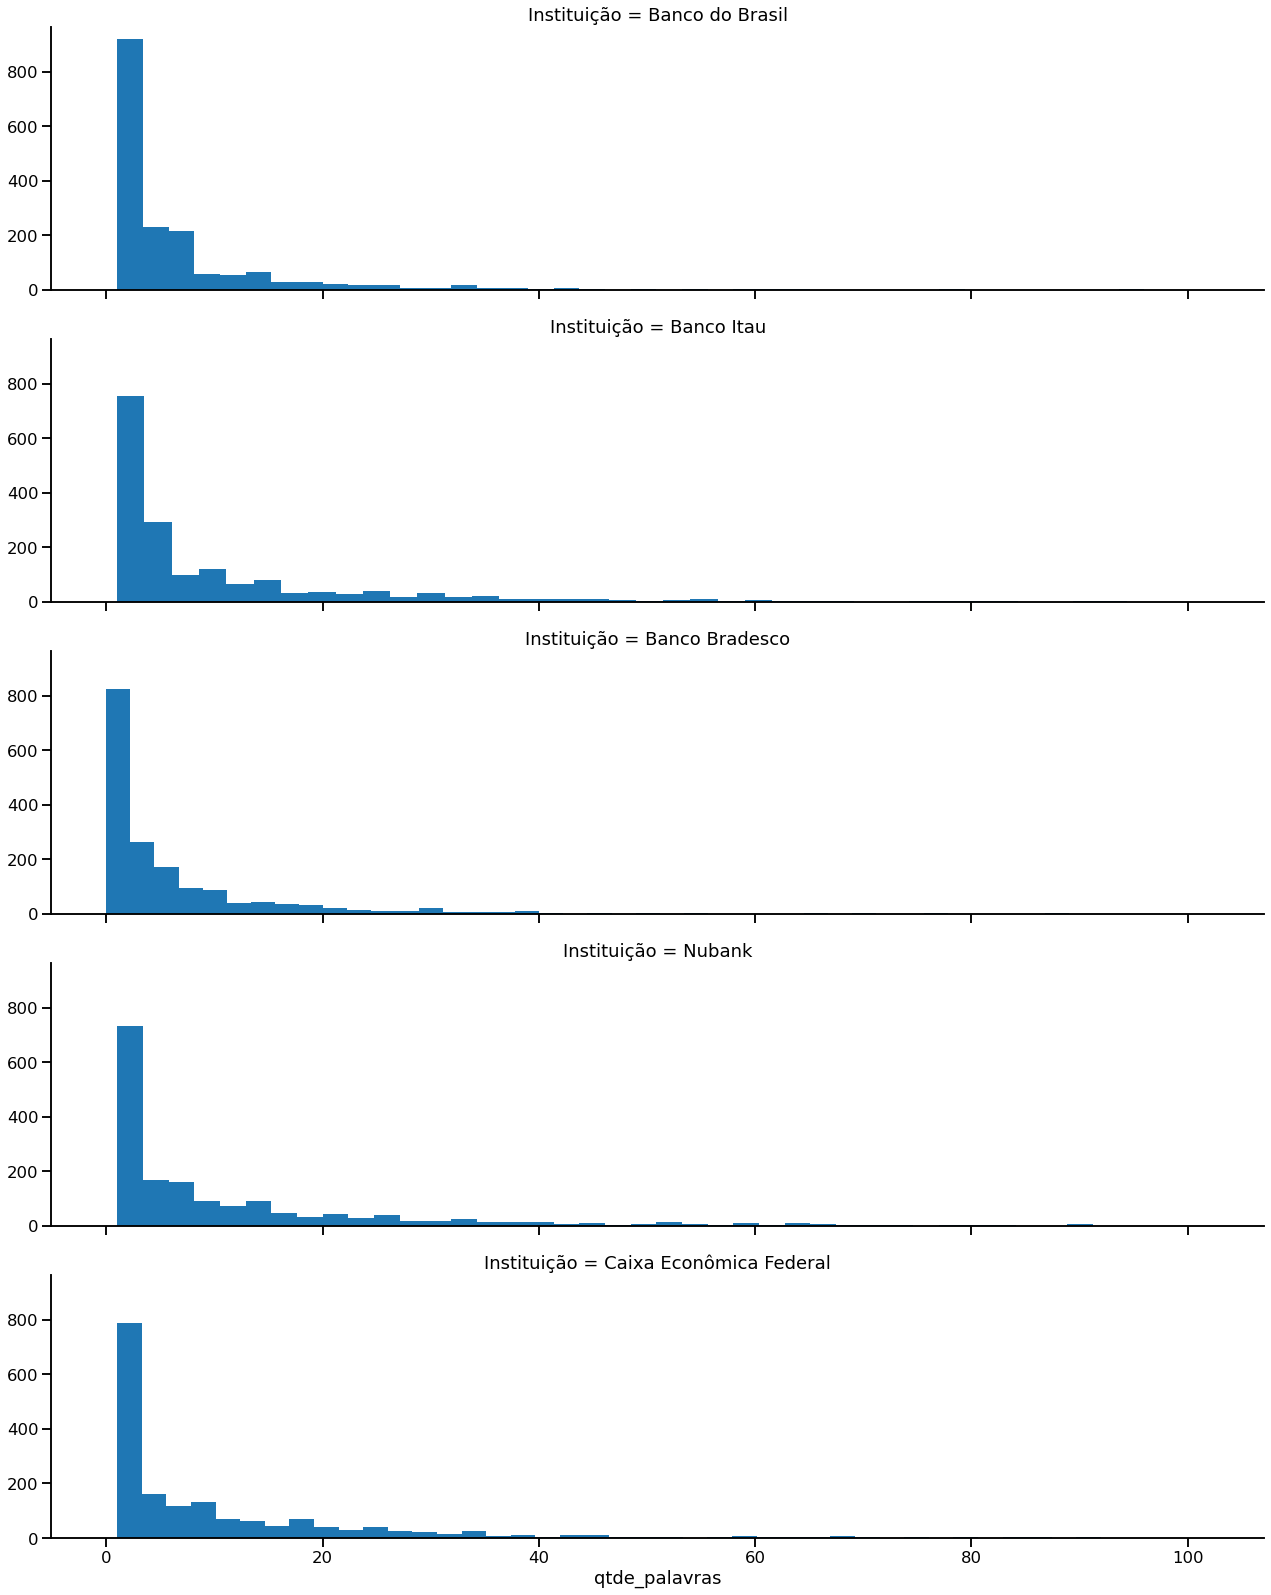

In [31]:
g = sns.FacetGrid(resenhas_df.dropna(), row='Instituição', height=4.5, aspect=4)
g = g.map(plt.hist, 'qtde_palavras', bins=40)

### 3.7. Correlações

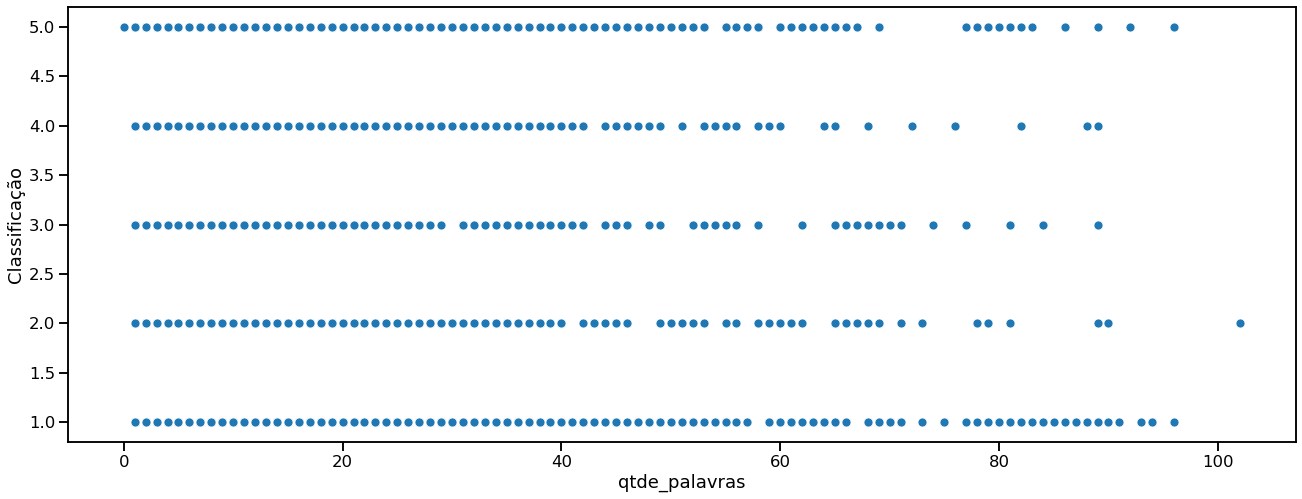

In [32]:
plt.figure(figsize = (22, 8))

ax = sns.scatterplot(x='qtde_palavras', y='Classificação', data=resenhas_df)

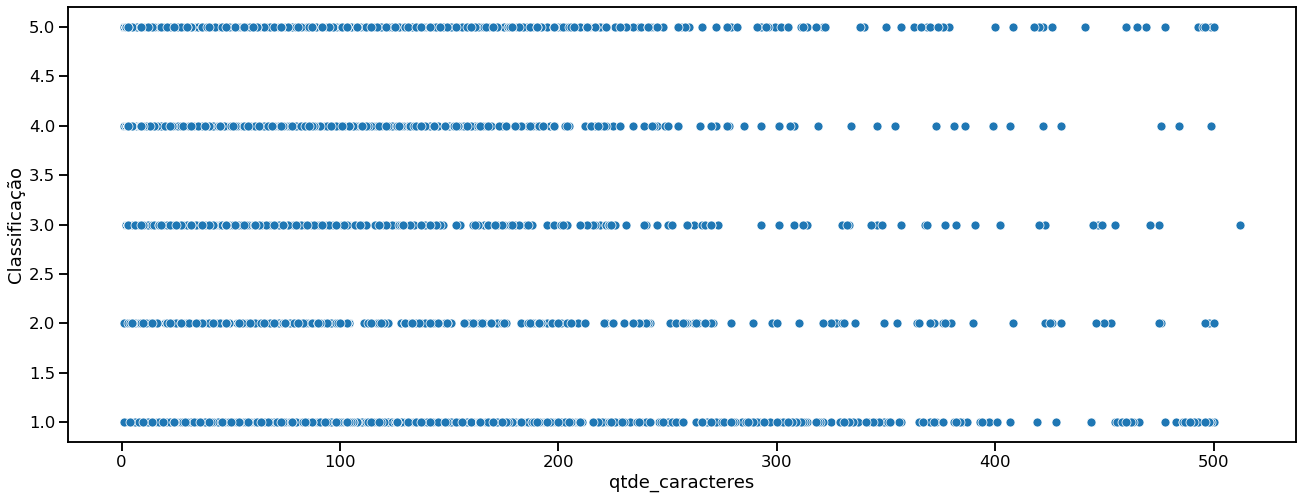

In [33]:
plt.figure(figsize = (22, 8))

ax = sns.scatterplot(x='qtde_caracteres', y='Classificação', data=resenhas_df)

### 3.8. Sentimentos

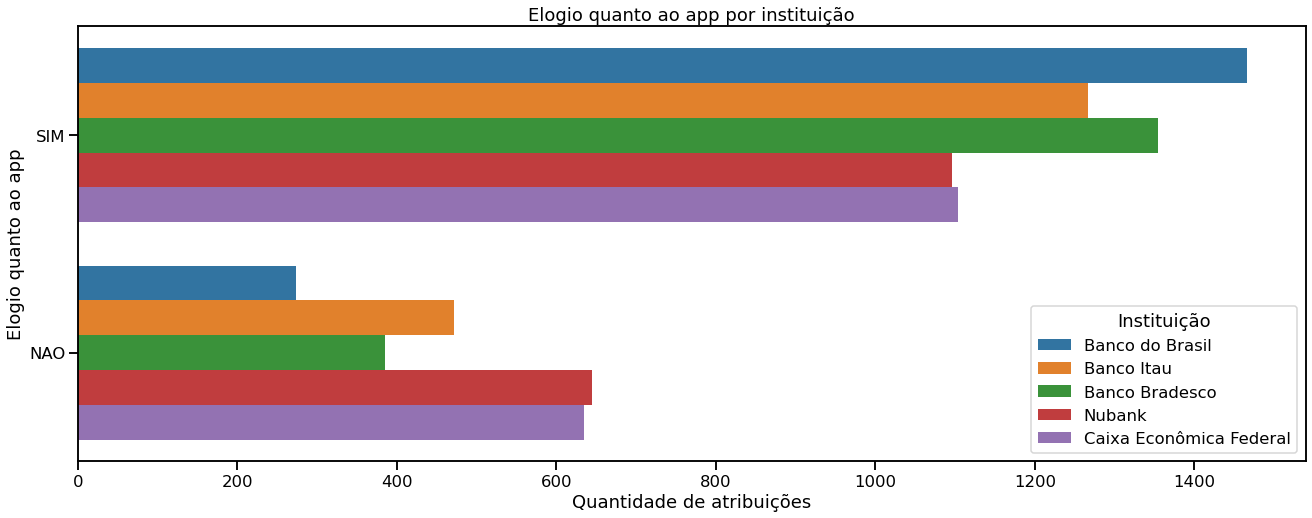

In [34]:
plt.figure(figsize = (22, 8))

ax = sns.countplot(y='Elogio quanto ao app', hue='Instituição', data=resenhas_df)
ax.set(title = 'Elogio quanto ao app por instituição', xlabel='Quantidade de atribuições', ylabel='Elogio quanto ao app')
plt.show()

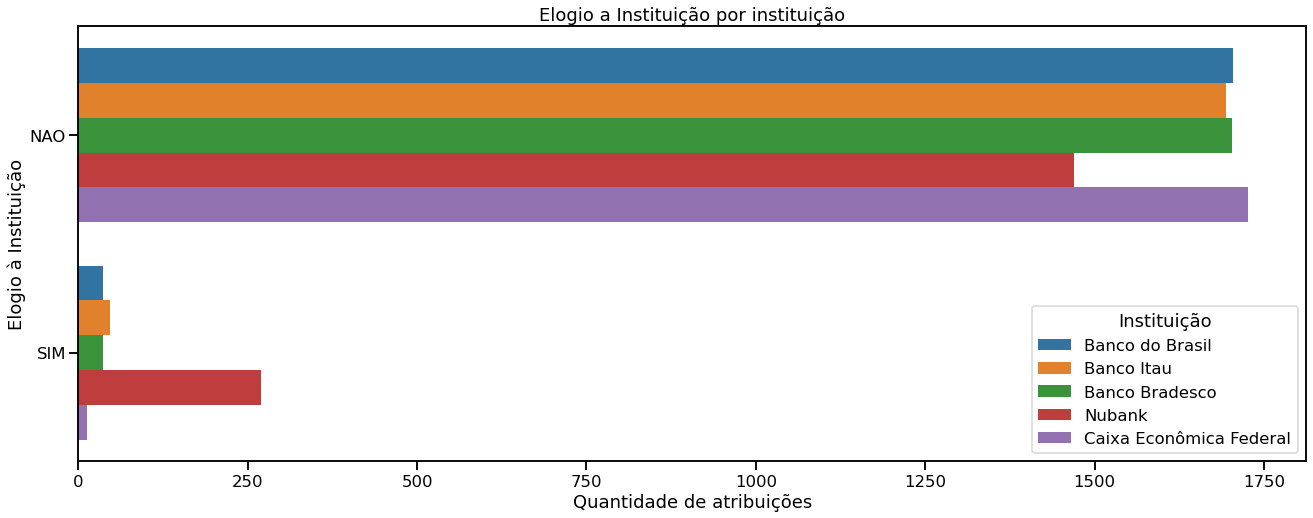

In [35]:
plt.figure(figsize = (22, 8))

ax = sns.countplot(y='Elogio a Instituição', hue='Instituição', data=resenhas_df)
ax.set(title = 'Elogio a Instituição por instituição', xlabel='Quantidade de atribuições', ylabel='Elogio à Instituição')
plt.show()

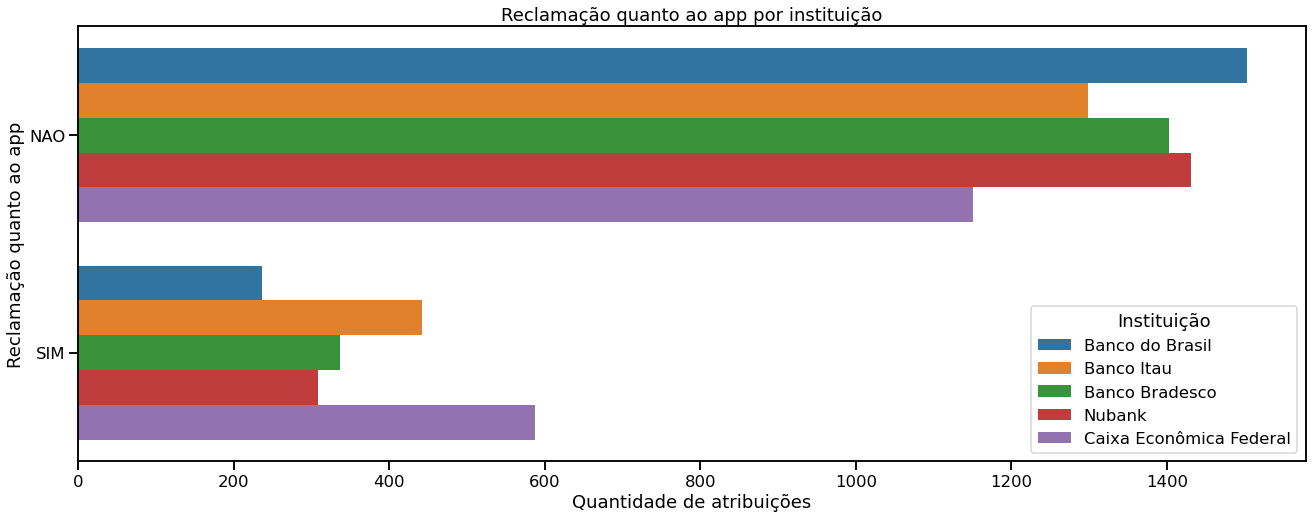

In [36]:
plt.figure(figsize = (22, 8))

ax = sns.countplot(y='Reclamação quanto ao app', hue='Instituição', data=resenhas_df)
ax.set(title = 'Reclamação quanto ao app por instituição', xlabel='Quantidade de atribuições', ylabel='Reclamação quanto ao app')
plt.show()

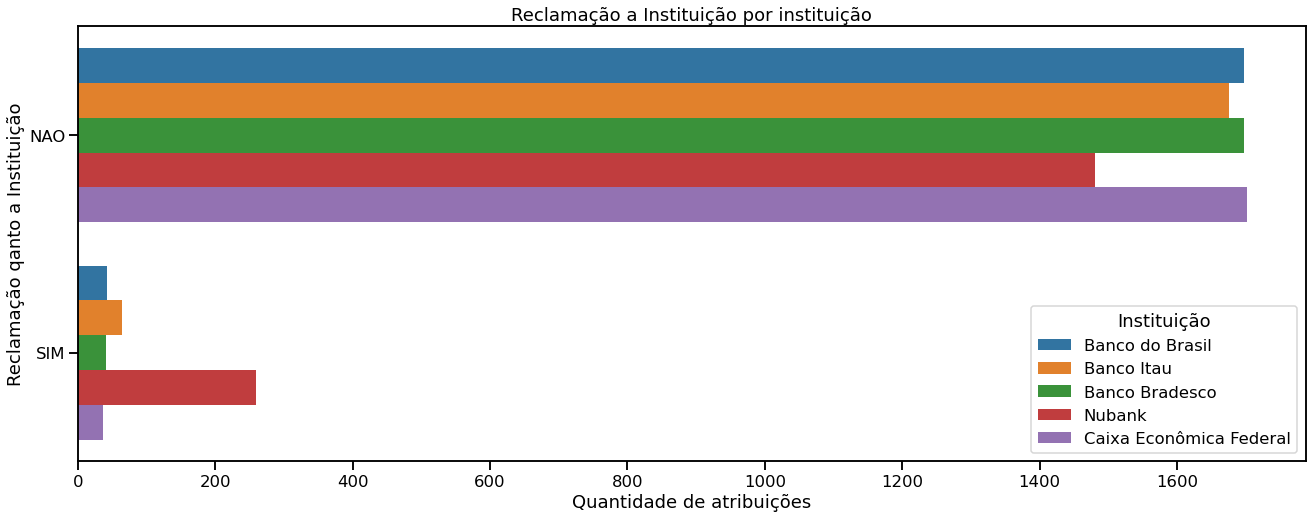

In [37]:
plt.figure(figsize = (22, 8))

ax = sns.countplot(y='Reclamação a Instituição', hue='Instituição', data=resenhas_df)
ax.set(title = 'Reclamação a Instituição por instituição', xlabel='Quantidade de atribuições', ylabel='Reclamação qanto a Instituição')
plt.show()

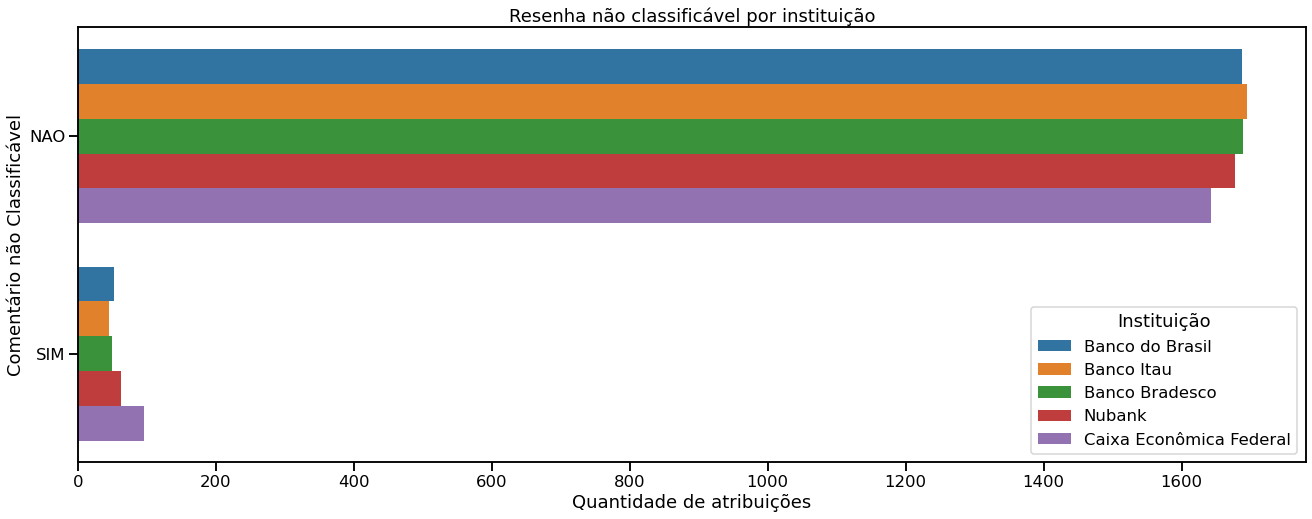

In [38]:
plt.figure(figsize = (22, 8))

ax = sns.countplot(y='Não Classificável', hue='Instituição', data=resenhas_df)
ax.set(title = 'Resenha não classificável por instituição', xlabel='Quantidade de atribuições', ylabel='Comentário não Classificável')
plt.show()

Com isso encerra-se esta primeira etapa, que é o entendimento da base de dados.

# Fim